## League of Legends Diamond Ranked Games (10 mins)

### Introduction

---

- 본 데이터는 리그 오브 레전드 (이하 롤) 의 다이아몬드급 경기 (공부로 따지면 수능 1등급) 의 처음부터 10분간 경기 데이터 이다.
- 우리가 분석 할 내용은 어떤 행동들이 경기를 이기는 요소인지를 분석하기 위해 진행함.
- 본 노트북에 사용될 데이터 셋은 다음 링크를 통해 다운 받을 수 있음.
- https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

### 리그 오브 레전드는 어떤 게임인가요 ?
---

![리그오브레전드_설명_그림](https://post-phinf.pstatic.net/MjAxNjEyMTFfMTU2/MDAxNDgxNDYwMzYzMDQ4.tyJfd79L_clDZct5qfNb357pE4jVNB-2EDsfrslZIqkg.arBBAPKIBx2T7QjRI1TD2F1_5Pv9dFruCjCXRki8QjIg.JPEG/Summoners_rift_season_4_map.jpg?type=w1200)

- https://kr.leagueoflegends.com/ko-kr/how-to-play/
- 5대5 전략 게임
- 적을 처지하고 포탑을 파괴하면서 최종 넥서를 파괴하면 승리하는 게임

### 리그 오브 레전드 이기는 법
---
- 인터넷에 리그 오브 레전드 이기는 법을 치면 수많은 방법들이 나옴
- 허나 대부분 자신의 티어 (n등급)을 밝히며 ~ 하시면 됩니다 라는식의 글이 대다수
- 과연 다음과 같은 말은 진실일까?
- 우리는 데이터기반으로 분석을 통해 결론을 도출해낼 것이다.


### 뱅뱅이론
---
- 우리나라 업계 매출 최고 청바지 브랜드는 어디일까
- 리바이스? 게스?
- 흥미로운 사실은 뱅뱅이 청바지 업계 매출 최고 브랜드임
- 우리는 우리 생각보다 세상을 모르고 있음.
- 우리는 사실 매우 일부분에 불과하며, 우리가 아는 사실은 전체를 보았을 때 거짓일 가능성이 높다 !
- 여담으로 롯데리아도 햄버거 브랜드 업계 1위임. 하지만 내 주변 누구도 롯데리아가 맛있다고 말하는 사람이 없음.

![뱅뱅이론](http://ko.experiments.wikidok.net/api/File/Real/5a0cdb7b9adb37e77efe1eb6)

## 데이터 분석
--- 

### 데이터 import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('high_diamond_ranked_10min.csv', encoding = 'utf-8')
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


### Data Exploration

#### Columns
- blueWins : 블루팀이 이기가거나 지거나 (이진변수, 0 : 졌음, 1 : 이겼음)
- WardsPlaced : 와드를 설치한 횟수 (시야를 밝혀주는 주요한 요소)
- WardsDestroyed : 와드를 파괴한 횟수
- FisrtBlood : 게임에서 첫번째 Kill을 했는지 여부 (0 : x, 1 : 했음)
- Kills : 적은 처지한 횟수
- Deaths : 팀이 전사한 횟수
- Assits : 적을 처치할 때 도움을 준 횟수
- EliteMonsters : 팀이 엘리트 몬스터 (바론, 드래곤 등) 을 처치한 횟수
- Dragons : 드래곤을 처치한 횟수
- Heralds : 협곡의 정령을 처치한 횟수
- TowersDestroyed : 팀이 적의 구조물을 ㅊ제거한 횟수
- TotalGold : 팀의 전체 재화
- AvgLevel : 팀의 평균 레벨
- TotalExperience : 팀의 평균 경험치
- TotalMinionsKilled : 팀의 미니언 (재화의 수단이됨)을 처치한 횟수 (cs)
- TotalJungleMinionsKilled : 팀이 정글 몬스터 (중립 몬스터) 를 처치한 횟수
- GoldDiff : 상대팀과 비교했을때 재화보유량의 차이
- ExperienceDiff : 상대팀과 비교했을때 경험치보유량의 차이
- CSPerMin : 분당 미니언을 처치한 횟수 (분당 cs)
- GoldPerMin : 분당 팀의 재화 수급량

#### Glossary
- Warding totem : cctv 라고 생각하면됨. 안보이는곳의 시야를 밝혀줌. 사람들이 말할때 게임을 이기는 가장 중요한 요소로 평가됨
- Minions : 양쪽 팀에서 나오는 몬스터. 재화수급의 주요소
- Jungle Minions : 중립 몬스터. 재화수급의 주요소
- Elite monster : 중립 몬스터. 다른 몬스터들 보다 강력하며 처치가 어려우나 추가적인 보상이 주어짐
- Dragon : 엘리트 몬스터중 하나. 보상이 주어지며 게임에서 4번의 용을 처치하면 게임중 가장 뛰어난 보상이 주어짐. 5번째 용 또한 뛰어난 보상을 팀에게 부여함
- Herald : 협곡의 정령. 처치하면 타워를 철거하는데 도움을 줌
- Towers : 적의 넥서스를 공략하기 위해 제거해야하는 요소. 제거하면 재화를 줌
- Level : 레벨. 1부터 18까지 존재

#### Wins

In [3]:
data['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

- 레드팀과 블루팀의 승률은 거의 비슷하다고 봐도 무방할 정도의 수치임.
- 팀의 여부와 승률은 무관하다 !

#### Warps Placed

In [4]:
data[data['blueWins'] == 1]['blueWardsPlaced'].mean()

22.289858012170384

In [5]:
data[data['blueWins'] == 0]['blueWardsPlaced'].mean()

22.28672459082643

- 이기는 판과 지는판의 평균 와드 설치 개수를 비교한 결과 유사하게 나옴.
- 따라서 와드 설치 개수는 승률과 무관한 것으로 판단됨.

In [6]:
data['blueWardsPlacedDiff'] = data['blueWardsPlaced'] - data['redWardsPlaced']

In [7]:
data[data.blueWins == 1]['blueWardsPlacedDiff'].mean()


0.35963488843813385

In [8]:
data[data.blueWins == 0]['blueWardsPlacedDiff'].mean()

-0.5172762174176602

- 와드의 개수 차이는 승률에 어느정도 영향을 미치는것으로 판단
- 허나 지배적이진 않고 미세하게 영향을 미칠것으로 판단됨

In [9]:
data['blueWardsPlacedDiffBins'] = pd.qcut(data['blueWardsPlacedDiff'], q=10)

In [10]:
prob_wins = data.groupby('blueWardsPlacedDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueWardsPlacedDiffBins', 'win_probability']

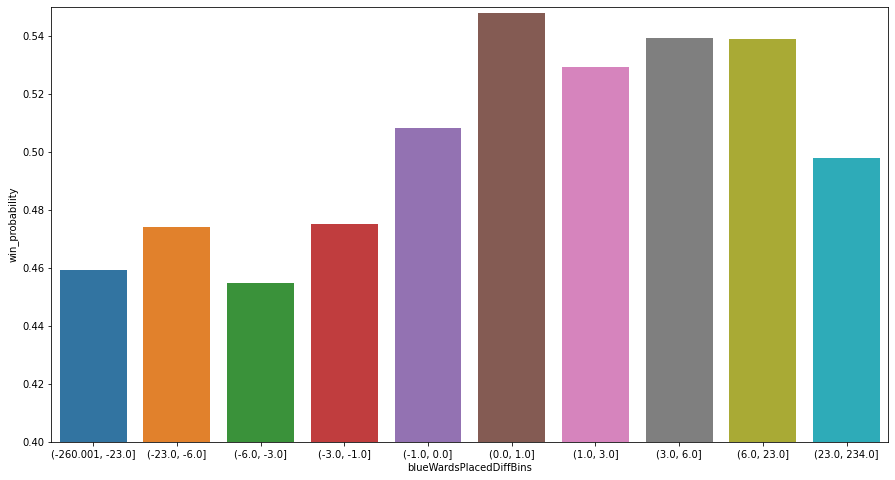

In [11]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="blueWardsPlacedDiffBins", y="win_probability", data=prob_wins)
l = ax.set(ylim=(0.4,0.55))

- 와드 설치 갯수의 차이가 커지면 커질수록 승률이 높아지는것을 보임
- 허나 [23.0, 234] 구간은 오히려 낮아지는것을 보임.

#### WardsDestroyed

In [12]:
data[data.blueWins == 1]['blueWardsDestroyed'].mean()

2.9212981744421906

In [13]:
data[data.blueWins == 0]['blueWardsDestroyed'].mean()

2.728834107900586

- 와드를 지운 평균 횟수는 승률에 영향을 거의 끼치지 않는 것으로 보임.
- 허나 0.2개 더 지웠을때 이기는 경향을 보임.

In [14]:
data['blueWardsDestroyedDiff'] = data['blueWardsDestroyed'] - data['redWardsDestroyed']

In [15]:
data[data.blueWins == 1]['blueWardsDestroyedDiff'].mean()


0.31683569979716025

In [16]:
data[data.blueWins == 0]['blueWardsDestroyedDiff'].mean()


-0.11254798949282684

- 와드를 지운 갯수의 차이가 많은 수록 이길 확률이 높음
- 허나 큰 차이를 보여주진 않음

In [17]:
prob_wins = data.groupby('blueWardsDestroyedDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueWardsDestroyedDiff', 'win_probability']

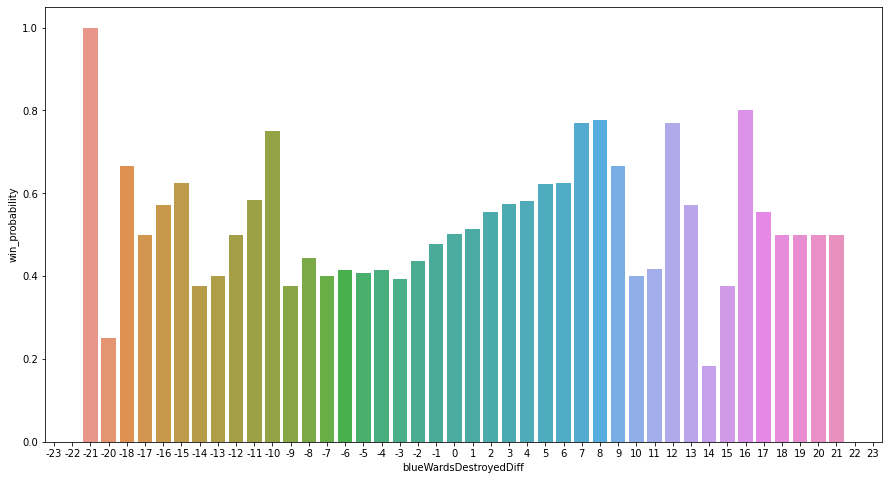

In [18]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="blueWardsDestroyedDiff", y="win_probability", data=prob_wins)

- 특별한 상관관계를 보여주진 않는것 같음.

#### First Blood

In [19]:
prob_wins = data.groupby('blueFirstBlood')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueFirstBlood', 'win_probability']

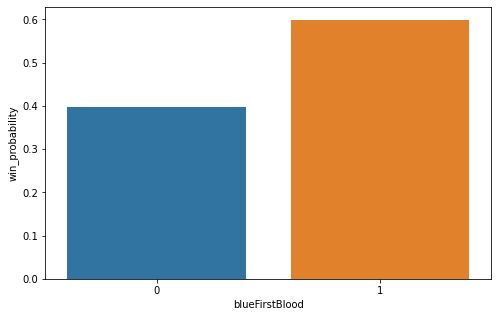

In [20]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="blueFirstBlood", y="win_probability", data=prob_wins)

- 적을 처음 처치할 시 베네핏이 주어짐
- 이를 바탕으로 이길 확률이 높아지는것을 알 수 있음

#### Kills

In [21]:
data[data.blueWins == 1]['blueKills'].mean()

7.201622718052739

In [22]:
data[data.blueWins == 0]['blueKills'].mean()

5.170135380885028

- 적을 많이 처치 할 수록 이길 확률이 높아짐

In [23]:
data['blueKillsDiff'] = data['blueKills'] - data['redKills']

In [24]:
data[data.blueWins == 1]['blueKillsDiff'].mean()

2.061257606490872

In [25]:
data[data.blueWins == 0]['blueKillsDiff'].mean()

-1.9610022226712467

In [26]:
prob_wins = data.groupby('blueKillsDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueKillsDiff', 'win_probability']

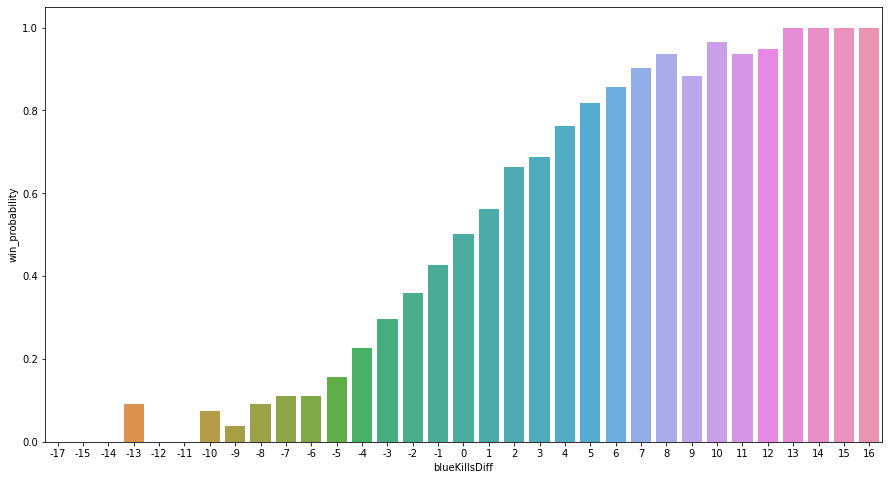

In [27]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="blueKillsDiff", y="win_probability", data=prob_wins)

- 적을 처치한 횟수가 많이 차이 날수록 이길 확률의 변화는 명확하게 보임
- 적을 처치한 횟수가 5번일 시 승률이 80%가 넘어감

#### Deaths

- 죽은 횟수는 상대팀의 처치 횟수의 반대임
- 따라서 결과도 반대가 나옴 (death = -kills)

#### Assists

In [28]:
data['blueAssistsDiff'] = data['blueAssists'] - data['redAssists']

In [29]:
prob_wins = data.groupby('blueAssistsDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueAssistsDiff', 'win_probability']

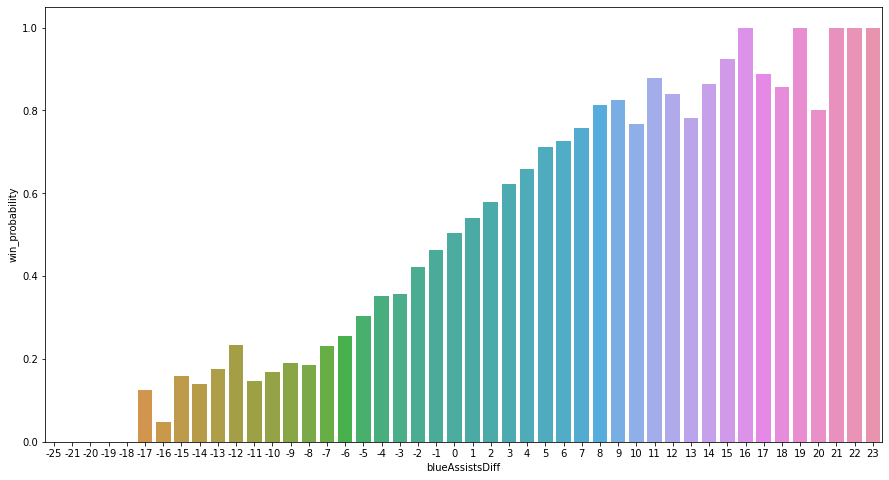

In [30]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="blueAssistsDiff", y="win_probability", data=prob_wins)

- 처치 횟수와 비슷한 양상을 보임

#### Elite Monsters

In [31]:
data[data.blueWins == 1]['blueEliteMonsters'].mean()

0.6890466531440163

In [32]:
data[data.blueWins == 0]['blueEliteMonsters'].mean()

0.41139624166498284

- 엘리트 몬스터를 많이 처치할 수록 이길 확률이 높아짐

In [33]:
data['blueEliteMonstersDiff'] = data['blueEliteMonsters'] - data['redEliteMonsters']

In [34]:
prob_wins = data.groupby('blueEliteMonstersDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueEliteMonstersDiff', 'win_probability']

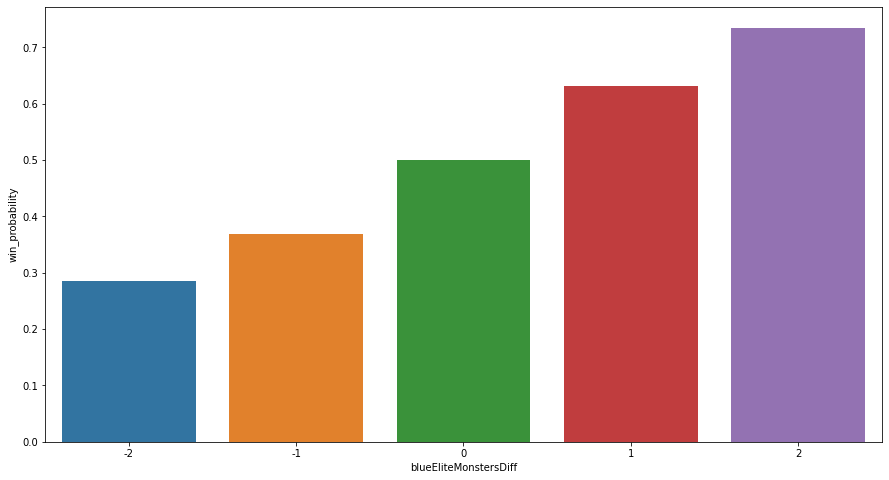

In [35]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="blueEliteMonstersDiff", y="win_probability", data=prob_wins)

- 엘리트 몬스터를 많이 처치할 수록 이점이 많이지는것으로 판단됨

#### Dragons

In [36]:
data['blueDragonsDiff'] = data['blueDragons'] - data['redDragons']

#### Heralds

In [37]:
data['blueHeraldsDiff'] = data['blueHeralds'] - data['redHeralds']

#### Towers destroyed

In [38]:
data[data.blueWins == 1]['blueTowersDestroyed'].mean()

0.0797160243407708

In [39]:
data[data.blueWins == 0]['blueTowersDestroyed'].mean()

0.02323701757930895

- 타워를 많이 제거할 수록 이길 확률이 높아지는것을 보임.
- 약간의 영향을 미치는 듯

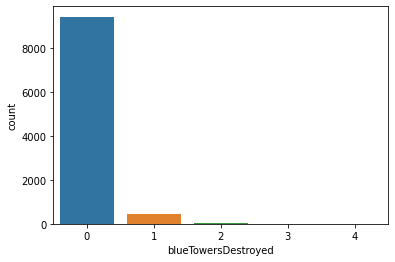

In [40]:
sns.countplot(data['blueTowersDestroyed'])

In [41]:
data['blueTowersDestroyedDiff'] = data['blueTowersDestroyed'] - data['redTowersDestroyed']

In [42]:
prob_wins = data.groupby('blueTowersDestroyedDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueTowersDestroyedDiff', 'win_probability']

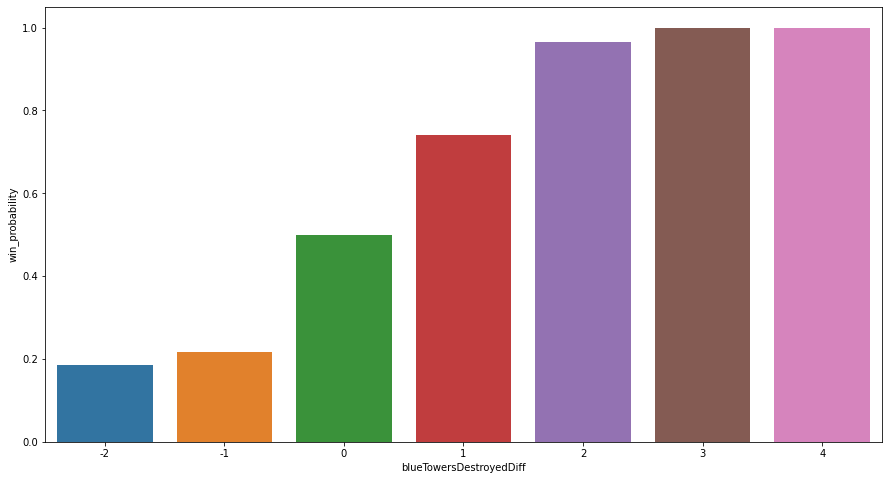

In [43]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="blueTowersDestroyedDiff", y="win_probability", data=prob_wins)

- 타워 차이가 1개 이상이 될 수록 이길 확률은 엄청나게 높아짐

#### Total Gold / Gold Difference / Gold Per Min

In [44]:
data[data.blueWins == 1]['blueTotalGold'].mean()

17145.263894523327

In [45]:
data[data.blueWins == 0]['blueTotalGold'].mean()


15864.111133562335

- 재화의 보유량이 높을 수록 이길확률이 높음
- 처치시 재화를 많이 얻음으로 아마 연관관계가 있지 않을까?

In [46]:
data['blueGoldDiffBins'] = pd.qcut(data['blueGoldDiff'], q=10, duplicates='drop')

In [47]:
prob_wins = data.groupby('blueGoldDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueGoldDiffBins', 'win_probability']

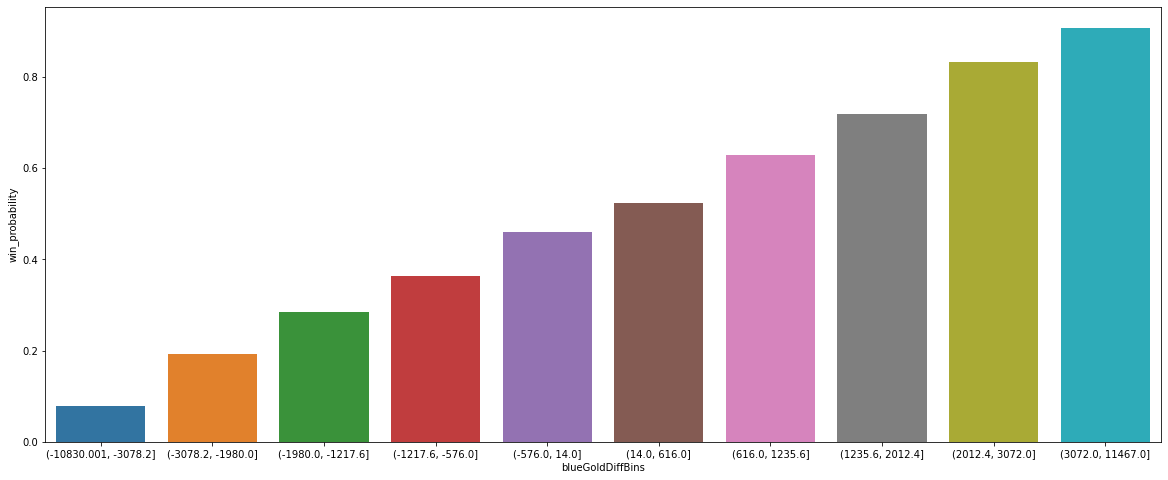

In [48]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="blueGoldDiffBins", y="win_probability", data=prob_wins)

- 재화 보유량의 차이가 커질수록 승률이 높아짐

#### Average Level

In [49]:
data[data.blueWins == 1]['blueAvgLevel'].mean()

7.025395537525356

In [50]:
data[data.blueWins == 0]['blueAvgLevel'].mean()

6.807031723580521

- 진 판과 이긴판의 평균 레벨은 비슷함

In [51]:
data['blueAvgLevelDiff'] = data['blueAvgLevel'] - data['redAvgLevel']

In [52]:
data['blueAvgLevelDiffBins'] = pd.qcut(data['blueAvgLevelDiff'], q=10, duplicates='drop')

In [53]:
prob_wins = data.groupby('blueAvgLevelDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueAvgLevelDiffBins', 'win_probability']

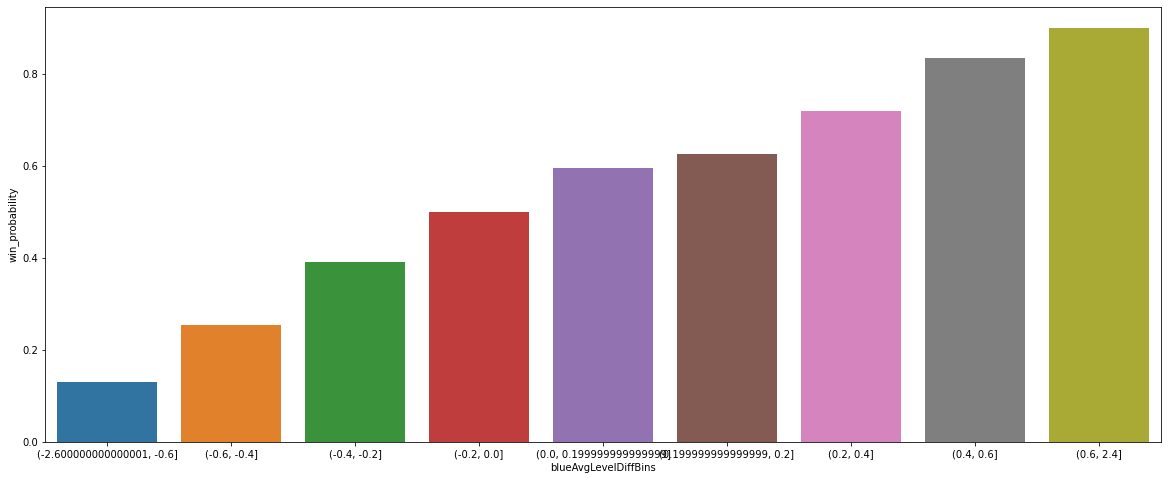

In [54]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="blueAvgLevelDiffBins", y="win_probability", data=prob_wins)

- 레벨의 차이와 승리확률은 관계가 있어 보임

#### Total Experience

In [55]:
data[data.blueWins == 1]['blueTotalExperience'].mean()

18404.57789046653

In [56]:
data[data.blueWins == 0]['blueTotalExperience'].mean()

17453.47161042635

- 경험치가 높을수록 이길 확률이 높음 (레벨과 일맥상통)

In [57]:
data['blueTotalExperienceDiffBins'] = pd.qcut(data['blueExperienceDiff'], q=10, duplicates='drop')

In [58]:
prob_wins = data.groupby('blueTotalExperienceDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueTotalExperienceDiffBins', 'win_probability']

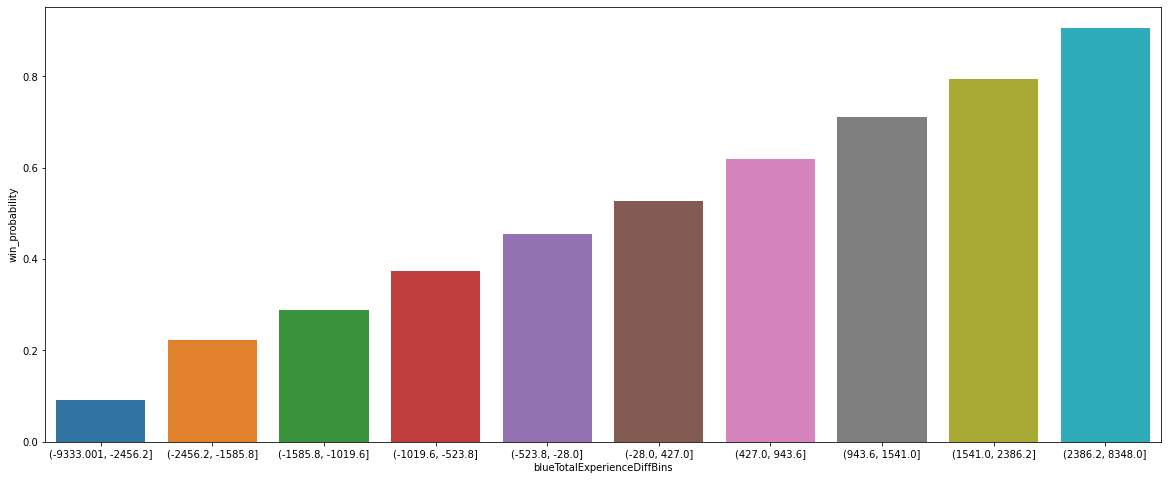

In [59]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="blueTotalExperienceDiffBins", y="win_probability", data=prob_wins)

- 경험치 차이가 날수록 이길확률은 높아짐

#### Total Minions Killed

In [60]:
data[data.blueWins == 1]['blueTotalMinionsKilled'].mean()

221.62494929006084

In [61]:
data[data.blueWins == 0]['blueTotalMinionsKilled'].mean()

211.79308951303292

- 미니언을 많이 처치할 수록 이길확률이 높아짐

In [62]:
data['blueTotalMinionsKilledDiff'] = data['blueTotalMinionsKilled'] - data['redTotalMinionsKilled']

In [63]:
data['blueTotalMinionsKilledDiffBins'] = pd.qcut(data['blueTotalMinionsKilledDiff'], q=10, duplicates='drop')

In [64]:
prob_wins = data.groupby('blueTotalMinionsKilledDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueTotalMinionsKilledDiffBins', 'win_probability']

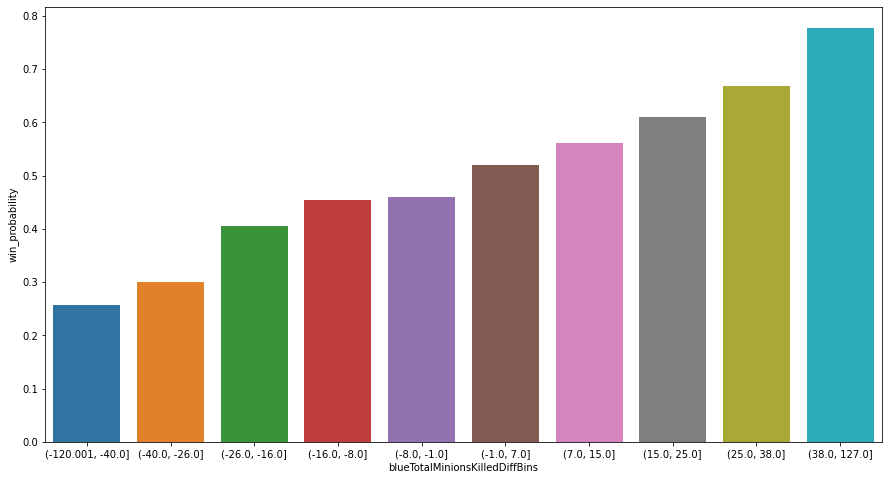

In [65]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="blueTotalMinionsKilledDiffBins", y="win_probability", data=prob_wins)

- 미니언을 처치한 횟수의 차가 날수록 이길확률이 높아짐

In [66]:
data['blueTotalJungleMinionsKilledDiff'] = data['blueTotalJungleMinionsKilled'] - data['redTotalJungleMinionsKilled']

In [67]:
data['blueCSPerMinDiff'] = data['blueCSPerMin'] - data['redCSPerMin']

### Correlation 

In [68]:
# blue 팀만 관찰할 것으로 red팀은 제거할 예정
cols = [c for c in data.columns if c.lower()[:3] != 'red']
data_blue = data[cols]
data_corr = data_blue.corr()['blueWins']

In [69]:
# 중복되는 데이터들은 제거함
data_blue = data_blue.drop(['blueGoldPerMin', 'blueCSPerMinDiff', 'blueTotalMinionsKilled'], 1)

In [70]:
# 최소 0.2 이상의 상관계수를 갖는 데이터만 취득
data_corr = data_blue.corr()['blueWins']
cols = data_corr[abs(data_corr) > 0.2].index.tolist()
data_blue = data_blue[cols]

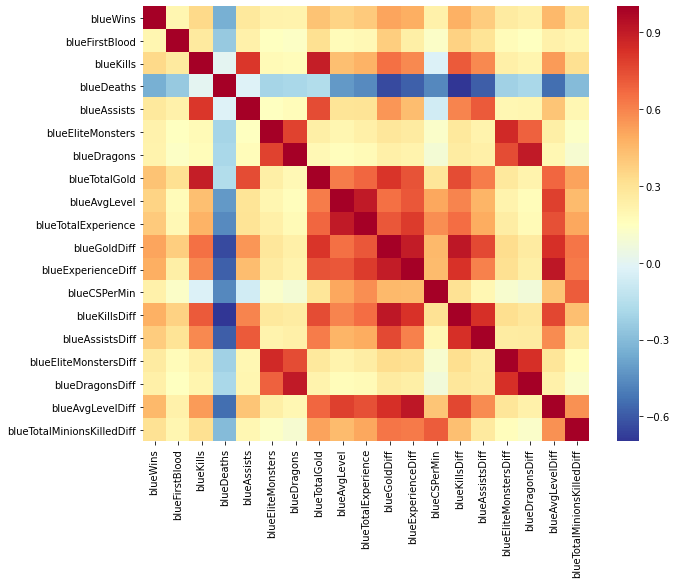

In [71]:
data_corr = data_blue.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data_corr, cmap = 'RdYlBu_r')

In [72]:
data_blue.corr()['blueWins'].sort_values(ascending=False)

blueWins                      1.000000
blueGoldDiff                  0.511119
blueExperienceDiff            0.489558
blueKillsDiff                 0.479379
blueAvgLevelDiff              0.452927
blueTotalGold                 0.417213
blueTotalExperience           0.396141
blueAssistsDiff               0.385866
blueAvgLevel                  0.357820
blueKills                     0.337358
blueTotalMinionsKilledDiff    0.309126
blueAssists                   0.276685
blueEliteMonstersDiff         0.259969
blueDragonsDiff               0.234264
blueCSPerMin                  0.224909
blueEliteMonsters             0.221944
blueDragons                   0.213768
blueFirstBlood                0.201769
blueDeaths                   -0.339297
Name: blueWins, dtype: float64